In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
%matplotlib inline

df = pd.read_excel("./data1.xls")
df

,区域,二级区域,小区名,详情信息,户型,面积（平米）,朝向,装修,楼层,建筑类型,总价（万）,单价（元/平）,id
0,滨江,奥体,众安嘉润公馆（杭州国际办公中心）,*大平层，江景房，视野好，房东诚心出售,5室2厅,290.98,东 西南 东北,精装,46,塔楼,1400.0,48114.0,1
1,滨江,奥体,绿地旭辉城,：奥体板块 精装修 品质小区 地铁口 诚心出售,3室2厅,137.75,南 北,精装,49,板楼,1250.0,90745.0,2
2,滨江,奥体,绿地旭辉城,1、房子为高档精装修， 2、户型好 3、业主诚心卖,3室2厅,87.84,南,精装,47,板楼,800.0,91075.0,3
3,滨江,奥体,绿地旭辉城,1、房子为高档精装修， 2、户型好 3、业主诚心卖,3室1厅,87.84,南,精装,47,板楼,850.0,96767.0,4
4,滨江,奥体,众安嘉润公馆（杭州国际办公中心）,2号线地铁口 钱江世纪城站，自住精装，拎包入住,1室1厅,45.01,南,精装,30,板楼,125.0,27772.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,余杭,中泰,庭院深深,中间位置 满五唯一 南北通透视野好 拎包入住装修好,3室2厅,136.03,南 北,精装,12,板楼,398.0,29259.0,59995
59995,余杭,中泰,庭院深深,自住精装 采光好 不延高架,2室2厅,83.55,南,精装,16,板楼,260.0,31120.0,59996
59996,余杭,中泰,庭院深深,自住精装拎包入住，视野好，中间楼层,2室1厅,97.28,南,精装,26,板塔结合,320.0,32895.0,59997
59997,余杭,中泰,庭院深深,自住精装三房，纯东边套，全明户型,3室2厅,86.54,南,精装,18,板楼,285.0,32933.0,59998


### 杭州每个区的二手房数量

In [2]:
df_house_count = df['区域'].value_counts().to_frame().reset_index()
df_house_count.columns = ['区域', '数量']
df_house_count

,区域,数量
0,萧山,10201
1,临安,7585
2,临平区,7052
3,余杭,7027
4,上城,6195
5,拱墅,5667
6,下城,5418
7,钱塘区,4108
8,滨江,3335
9,富阳,1917


### 按区域分析数量和价格

In [3]:
df_house_mean = df.groupby('区域')['单价（元/平）'].mean().sort_values(ascending=False).to_frame().reset_index()
df_house_mean

,区域,单价（元/平）
0,上城,51598.468765
1,滨江,49485.204498
2,西湖,44566.702128
3,下城,42707.325272
4,拱墅,40926.824246
5,余杭,34394.971254
6,萧山,34165.445545
7,钱塘区,30825.336417
8,临安,29249.338299
9,富阳,24575.803339


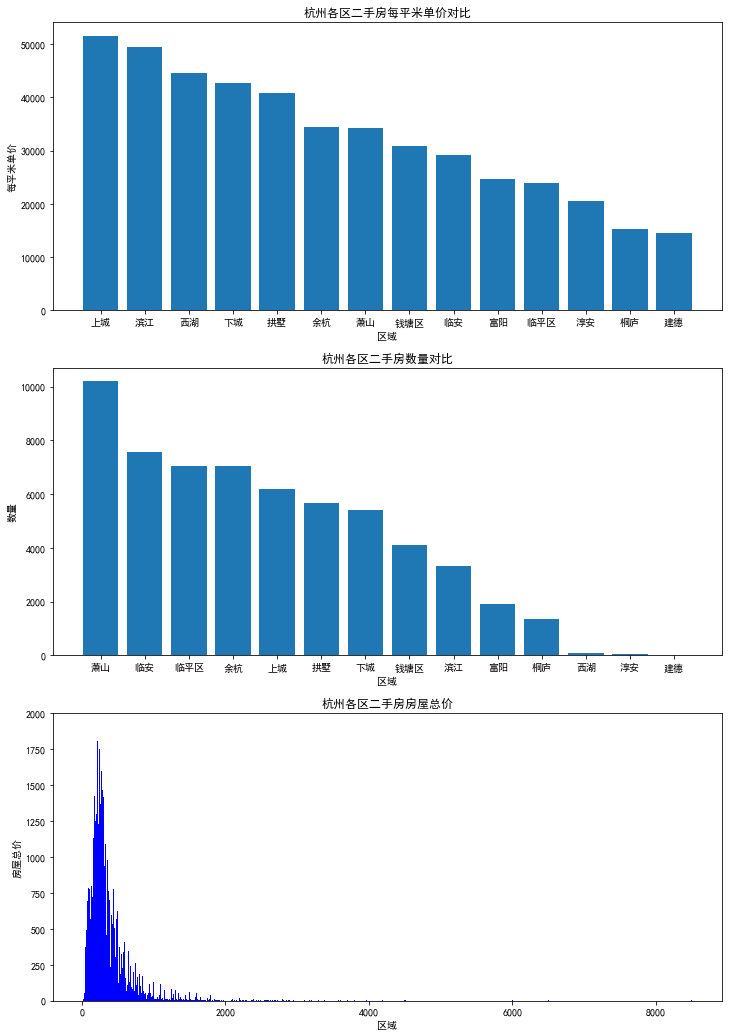

In [4]:
plt.rcParams['font.sans-serif']=['SimHei']
f, [ax1, ax2, ax3] = plt.subplots(3, 1, figsize=(12, 18))
ax1.bar('区域', '单价（元/平）', data=df_house_mean)
ax1.set_title('杭州各区二手房每平米单价对比')
ax1.set_xlabel('区域')
ax1.set_ylabel('每平米单价')

ax2.bar('区域', '数量', data=df_house_count)
ax2.set_title('杭州各区二手房数量对比')
ax2.set_xlabel('区域')
ax2.set_ylabel('数量')


box_data = df.groupby('区域')['总价（万）'].groups
# ax3.boxplot(box_data.values(), labels=box_data.keys())
ax3.hist(df['总价（万）'], bins=1000, color='b')
ax3.set_title('杭州各区二手房房屋总价')
ax3.set_xlabel('区域')
ax3.set_ylabel('房屋总价')

plt.savefig('images/img1')
plt.show()

### 房屋面积分析

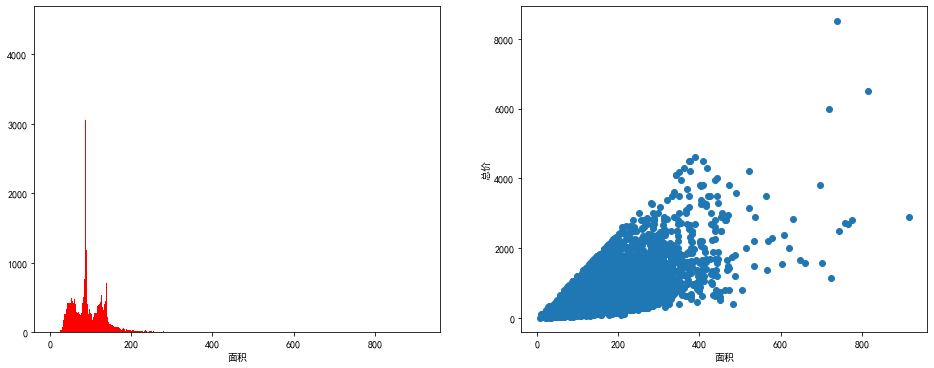

In [5]:
# matplotlib
f, [ax1,ax2] = plt.subplots(1, 2, figsize=(16, 6))
# 房屋面积
ax1.hist(df['面积（平米）'], bins=1000, color='r')
ax1.set_xlabel('面积')

# 房屋面积和价格的关系
ax2.scatter(x='面积（平米）', y='总价（万）', data=df)
ax2.set_xlabel('面积')
ax2.set_ylabel('总价')

plt.savefig('images/img2')
plt.show()

### 户型分析

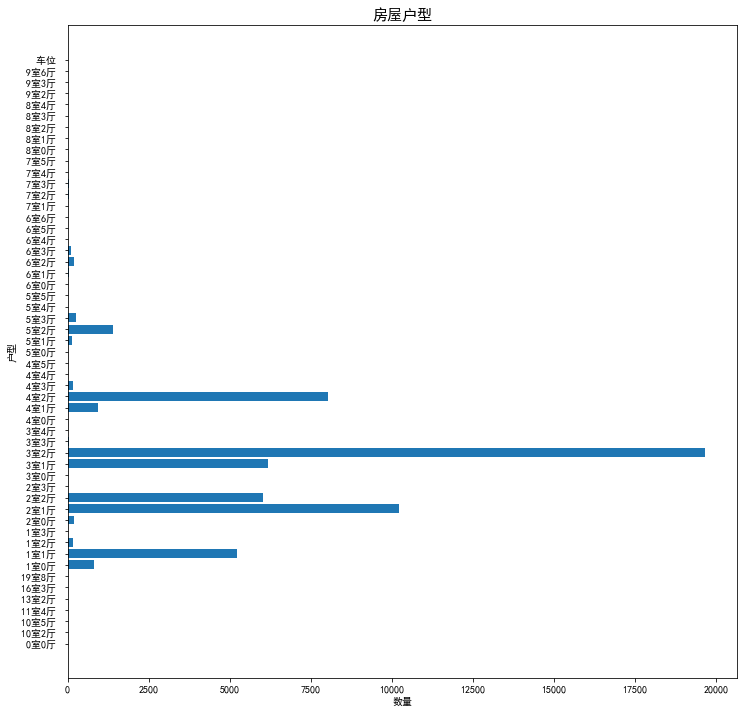

In [6]:
# matplotlib
f, ax1 = plt.subplots(figsize=(12,12))

countplot = df.groupby('户型')['id'].groups
width = [len(i) for i in countplot.values()]

ax1.barh(list(countplot.keys()), width)
ax1.set_title('房屋户型', fontsize=15)
ax1.set_xlabel('数量')
ax1.set_ylabel('户型')

plt.savefig('images/img3')
plt.show()

### 装修情况

In [7]:
houseDecoration = df['装修'].value_counts().to_frame().reset_index()
houseDecoration

,index,装修
0,精装,32279
1,简装,18461
2,毛坯,9110
3,其他,145
4,板楼,4
